<a href="https://colab.research.google.com/github/Afvanie/PCVK_Genap_2023/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [21]:
def convolution2d(image, kernel, stride, padding):
    # Melakukan Korelasi silang
    kernel = np.flipud(np.fliplr(kernel))

    # mengambil shape dari kernel dan padding sesuai parameter input
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Melakukan Hitung shape dari output konvolusi
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / stride) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / stride) + 1)
    output = np.zeros((xOutput, yOutput))

    # Mengimplementasikan equal padding ke semua sisi
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        
    else:
        imagePadded = image

    # Akses pixel
    for y in range(image.shape[1]):
        # Keluar dari konvolusi
        if y > image.shape[1] - yKernShape:
            break
        # jika hasil bagi y dengan stride = 0, Maka Konvolusi dilakukan
        if y % stride == 0:
            for x in range(image.shape[0]):
                # Setelah kernel berada di luar batas Melanjutkan ke baris berikutnya
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # jika hasil bagi x dengan stride = 0 ,Konvolusi dilakukan
                    if x % stride == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

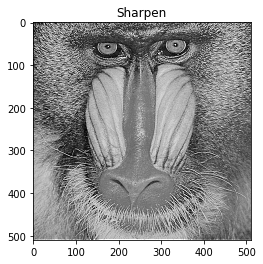

In [16]:
# Operasi sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img_sharpen = img_gray.copy()
img_sharpen = convolution2d(img_sharpen, kernel_sharpen,1,2)

plt.title("Sharpen")
plt.imshow(img_sharpen, cmap='gray',vmin=0, vmax=255)

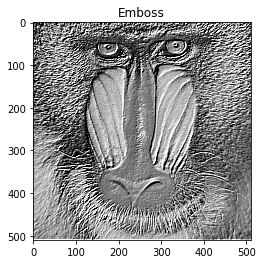

In [17]:
# Operasi emboss
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

img_emboss = img_gray.copy()
img_emboss = convolution2d(img_emboss, kernel_emboss,1,2)

plt.title("Emboss")
plt.imshow(img_emboss, cmap='gray',vmin=0, vmax=255)

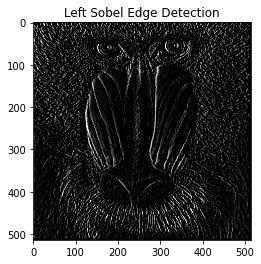

In [22]:
# Operasi Left Sobel Edge Detection

kernel_LSED = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])

img_LSED = img_gray.copy()
img_LSED = convolution2d(img_LSED, kernel_LSED,1,2)

plt.title("Left Sobel Edge Detection")
plt.imshow(img_LSED, cmap='gray',vmin=0, vmax=255)

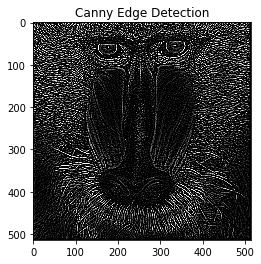

In [23]:
# Operasi Canny Edge Detection

kernel_CED = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

img_CED = img_gray.copy()
img_CED = convolution2d(img_CED, kernel_CED,1,2)

plt.title("Canny Edge Detection")
plt.imshow(img_CED, cmap='gray',vmin=0, vmax=100)


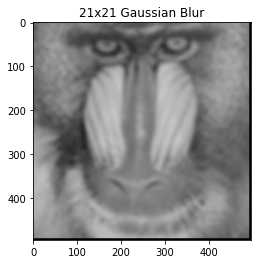

In [24]:
# Operasi 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel((kernel_size), sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_blur = img_gray.copy()
img_blur = convolution2d(img_blur, gauss_kernel,1,2)

plt.title("21x21 Gaussian Blur")
plt.imshow(img_blur, cmap='gray',vmin=0, vmax=255)
